# DHRUV DESAI - DATA SCIENCE AND BUSINESS ANALYTICS INTERN
Task 1 :  Prediction using Supervised ML

Problem Statement: Predict the percentage score of a student based on the no. of study hours.

### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Import Data

In [2]:
#To import the data:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.dropna(inplace=True)  #To drop empty rows
data.head(5) #Displaying a sample of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.head() # Displays the top 5 rows of our data set 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail() # Displays the bottom 5 rows 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.isnull().sum()# looking for missing values

Hours     0
Scores    0
dtype: int64

### To check the Correlation

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


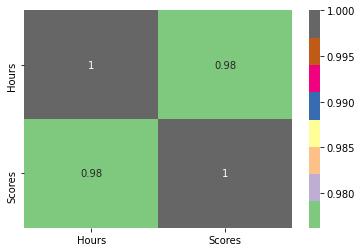

In [7]:
#Observing the relationship between no of hours studied and score percentage using correlation
corr_matrix = data.corr()
corr_matrix
sns.heatmap(data=corr_matrix, cmap="Accent", annot=True)
plt.show()

### Build a Model

Let us a see through plot whether we have a Linear relationship or not

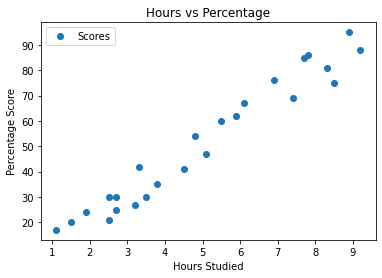

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

As we can observe a positive linear realtionship between the Hours studied and Percentage Score

### Linear Regression Model

We divide the dataset into attributes and labels to X and y respectively

Splitting the dataset : 80% for training and 20% for testing

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
#Splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [12]:
#Using model to make predictions
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plotting train,test and predicted scores

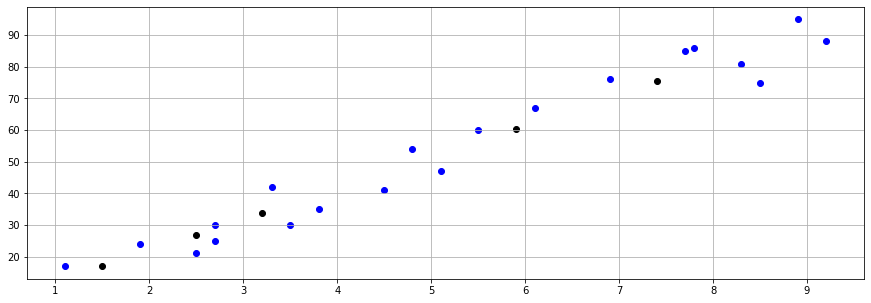

In [13]:
plt.figure(figsize = (15,5))
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, regressor.predict(X_test),  color='black')
plt.grid()
plt.show()

As we can observe the points are well predicted

## Testing what will be the percentage if study hours is 9.25

In [14]:
regressor.coef_

array([9.91065648])

In [15]:
regressor.intercept_

2.0181600414346974

Regression Equation will be

In [16]:
equation = regressor.intercept_ + regressor.coef_ * 9.25

In [17]:
equation

array([93.69173249])

If someone studies for 9.25 hourse he or she is expected to get 93.69 %

## Let us see the Accuracy of the Model

In [18]:
from sklearn.metrics import mean_absolute_error,r2_score
rsq=r2_score(y_test,y_pred)
print("R square : ",round(rsq,3))
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error : ",round(mae,3))

R square :  0.945
Mean absolute error :  4.184


R-squared is a statistical measure of how close the data are to the fitted regression line

Mean Absolute Error (MAE) is another loss function used for regression models. MAE is the 
sum of absolute differences between our target and predicted variables. So it measures the 
average magnitude of errors in a set of predictions, without considering their directions.